In [72]:
import pandas as pd
import numpy as np
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [73]:
data=pd.read_csv("DataBihourly.csv")

In [74]:
data.head()

,Date,Settlement_Period,Natural_Gas,Oil,Coal,Nuclear,Wind,Pumped_Storage,Hydro,Gas,Other,France_Import,Ireland_Import1,Netherlands_Import,Ireland_Import2,BioMass,Belgium_Import,France1,France2,Norway
0,22-02-2015,1,5293,0,12980,7777,1456,0,681,0,784,1496,0,1002,0,0,0,0,0,0
1,22-02-2015,2,5547,0,12947,7772,1401,0,682,0,784,1496,0,1028,0,0,0,0,0,0
2,22-02-2015,3,5168,0,13314,7779,1604,0,594,0,782,1496,0,982,0,0,0,0,0,0
3,22-02-2015,4,4498,0,13421,7768,1548,0,592,0,781,1496,0,1010,0,0,0,0,0,0
4,22-02-2015,5,4660,0,13304,7778,1351,0,584,0,780,1496,0,1016,0,0,0,0,0,0


In [75]:
data["Date"]=pd.to_datetime(data["Date"])
data = data.drop(columns='Settlement_Period')

In [76]:
data.dtypes

Date                  datetime64[ns]
Natural_Gas                    int64
Oil                            int64
Coal                           int64
Nuclear                        int64
Wind                           int64
Pumped_Storage                 int64
Hydro                          int64
Gas                            int64
Other                          int64
France_Import                  int64
Ireland_Import1                int64
Netherlands_Import             int64
Ireland_Import2                int64
BioMass                        int64
Belgium_Import                 int64
France1                        int64
France2                        int64
Norway                         int64
dtype: object

In [77]:
data1=pd.DataFrame().assign(Date=data["Date"])
data = data.groupby("Date").sum()

In [80]:
cols=data.columns
print(len(cols))
cols

18


Index(['Natural_Gas', 'Oil', 'Coal', 'Nuclear', 'Wind', 'Pumped_Storage',
       'Hydro', 'Gas ', 'Other', 'France_Import', 'Ireland_Import1',
       'Netherlands_Import', 'Ireland_Import2', 'BioMass', 'Belgium_Import',
       'France1', 'France2', 'Norway'],
      dtype='object')

In [84]:
data.Natural_Gas+data.Oil

Date
2015-01-03    203543
2015-01-04    393550
2015-01-05    531211
2015-01-06    408758
2015-01-07    486103
               ...  
2022-11-02    689888
2022-11-03    299819
2022-12-01    978610
2022-12-02    257930
2022-12-03    221462
Length: 2595, dtype: int64

In [87]:
df = pd.DataFrame().assign(Date=data1['Date'])
     

In [92]:
df['Non_Renewable']=(data['Natural_Gas']+data['Oil']+data['Coal']+data['Gas ']+data['BioMass'])

In [93]:
df.head()

,Date,Non_Renewable
0,2015-02-22,NaN
1,2015-02-22,NaN
2,2015-02-22,NaN
3,2015-02-22,NaN
4,2015-02-22,NaN


In [128]:
df=pd.read_csv('datanew.csv')

In [99]:
df["Date"]=pd.to_datetime(df["Date"])

In [102]:
df = df.drop(columns='Unnamed: 0')

In [113]:
df=df.set_index('Date')

In [127]:
df.index

DatetimeIndex(['2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-11', '2015-01-12',
               ...
               '2022-09-03', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-12-01',
               '2022-12-02', '2022-12-03'],
              dtype='datetime64[ns]', name='Date', length=2595, freq=None)

In [115]:
df.columns

Index(['Non_Renewable', 'Renewable', 'Other', 'Nuclear', 'Import'], dtype='object')

In [118]:
dfm=df.resample('M').sum()

In [135]:
dfm.head()

,Non_Renewable,Renewable,Other,Nuclear,Import
Date,,,,,
2015-01-31,8280748,1665277,641861,3489581,1328710
2015-02-28,15663564,3405957,1015716,6104602,2177976
2015-03-31,29325780,4454208,1473000,9764739,3504468
2015-04-30,23684459,3775014,1523174,9857019,3930662
2015-05-31,22069216,4703241,1537508,10279744,3669080


In [140]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-31 to 2022-12-31
Freq: M
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Non_Renewable  96 non-null     int64
 1   Renewable      96 non-null     int64
 2   Other          96 non-null     int64
 3   Nuclear        96 non-null     int64
 4   Import         96 non-null     int64
dtypes: int64(5)
memory usage: 6.6 KB


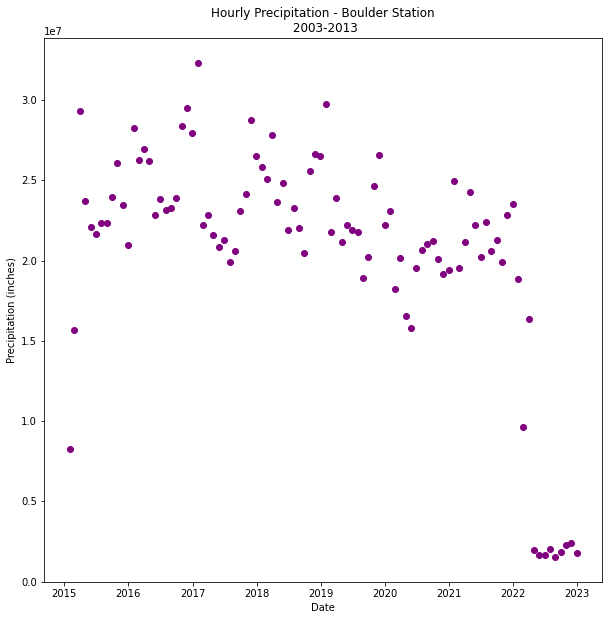

In [119]:

fig, ax = plt.subplots(figsize=(10, 10))
# Add x-axis and y-axis
ax.scatter(dfm.index.values,
           dfm['Non_Renewable'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Hourly Precipitation - Boulder Station\n 2003-2013")

plt.show()

[Text(0.5, 1.0, 'Seasonality check Non_Renewable')]

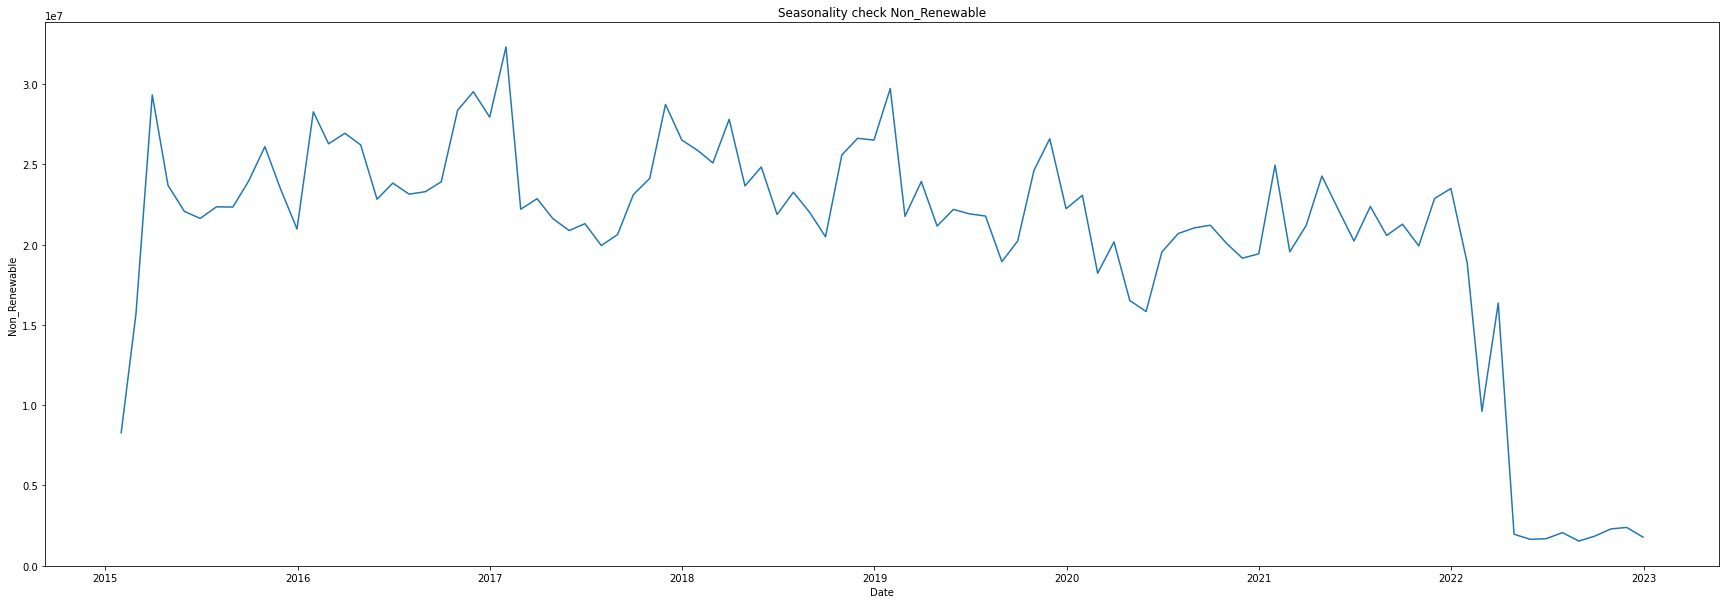

In [123]:
plt.rcParams["figure.figsize"] = (30,10)
sns.lineplot(data=dfm, x="Date", y="Non_Renewable").set(title="Seasonality check Non_Renewable")


[Text(0.5, 1.0, 'Seasonality check Renewable')]

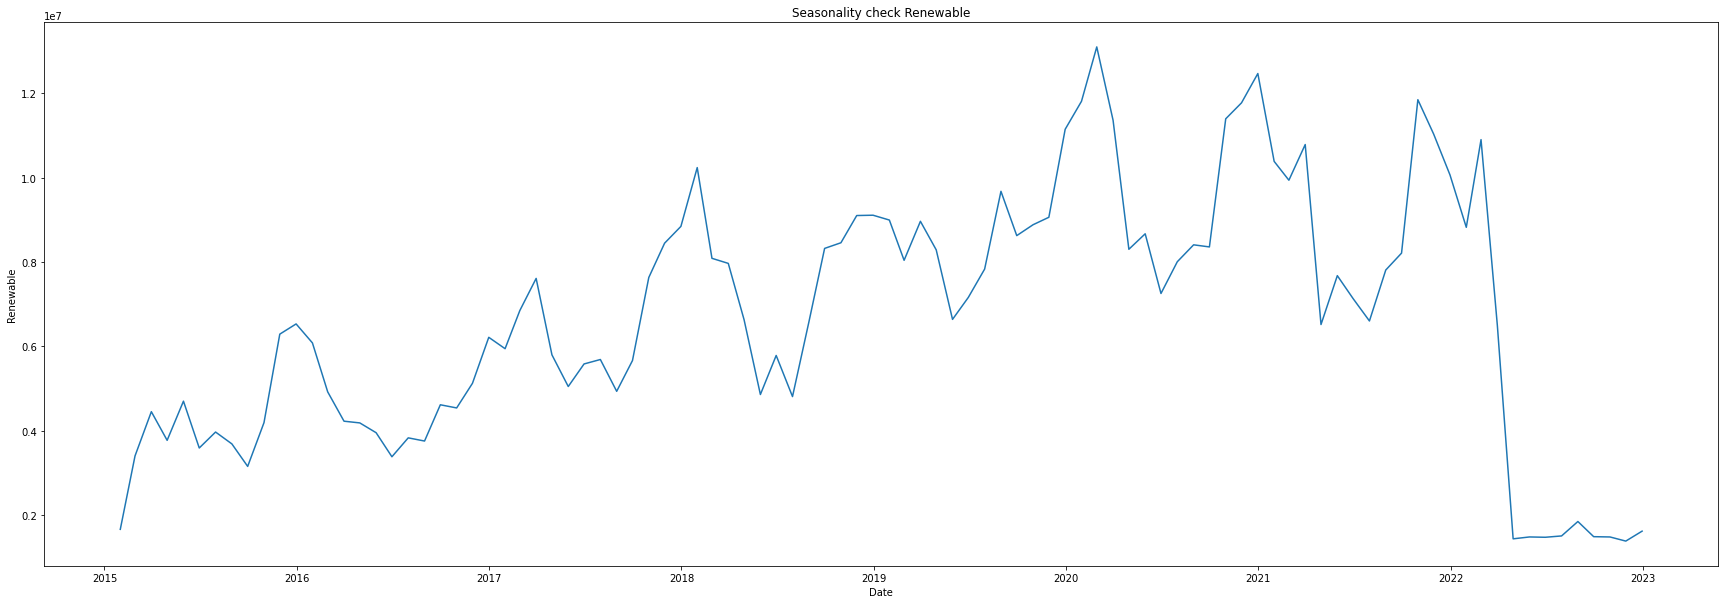

In [124]:
plt.rcParams["figure.figsize"] = (30,10)
sns.lineplot(data=dfm, x="Date", y="Renewable").set(title="Seasonality check Renewable")

In [143]:
def make_predictionm(time,data11,prr):
    pred1= pd.DataFrame().assign(ds=time,y=data11)
    from prophet import Prophet
    m = Prophet()
    m.fit(pred1)
    future = m.make_future_dataframe(periods=prr,freq='M')
    forecast = m.predict(future)
    fig1 = m.plot(forecast)
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(prr+10))

In [144]:
make_prediction(dfm.index,dfm.Non_Renewable,12*2)

ValueError: Dataframe has less than 2 non-NaN rows.

In [129]:
def make_prediction(time,data11,prr):
    pred1= pd.DataFrame().assign(ds=time,y=data11)
    from prophet import Prophet
    m = Prophet()
    m.fit(pred1)
    future = m.make_future_dataframe(periods=prr,freq='d')
    forecast = m.predict(future)
    fig1 = m.plot(forecast)
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(prr+10))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -142.502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       3140.56   0.000173588       80.4651   2.297e-06       0.001      172  LS failed, Hessian reset 
      99       3140.57   3.50829e-05       58.3998           1           1      181   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       3140.57   7.18814e-08       65.5563     0.03056           1      224   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
             ds           yhat     yhat_lower     yhat_upper
2585 2022-09-03  325190.230360  159806.714686  483893.669530
2586 2022-10-01  363753.657351  218989.819655  539210.784287
2587 2022-10-02  362979.452015  201257.817256  521194.670661
2588 2022-10-03  359711.011452  201731.649017  521777.239351
2589 2022-11-01  402829.420646  236249.317856  565144.817744
...         ...   

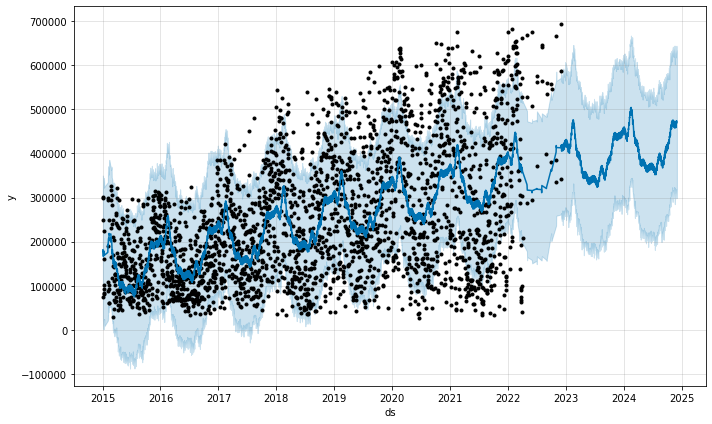

In [131]:
make_prediction(df['Date'],df['Renewable'],365*2)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -69.4079
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       3888.95    0.00035705       81.2968   4.169e-06       0.001      170  LS failed, Hessian reset 
      99       3888.96   2.79112e-05       69.6251      0.3248      0.3248      174   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       3888.97     1.624e-07       70.1936      0.2957           1      220   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
             ds           yhat     yhat_lower    yhat_upper
2585 2022-09-03  566863.475751  315764.229815  8.356950e+05
2586 2022-10-01  587016.145767  335078.669430  8.335669e+05
2587 2022-10-02  576696.806434  322851.131427  8.441823e+05
2588 2022-10-03  698163.953136  423564.722709  9.494017e+05
2589 2022-11-01  744416.730999  482699.176663  1.012756e+06
...         ...         

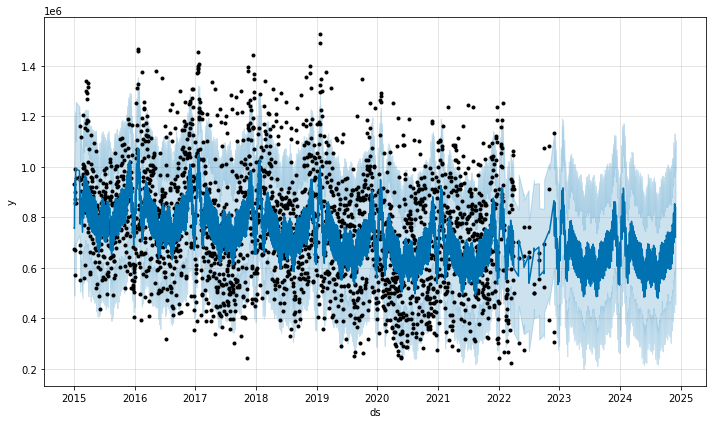

In [132]:
make_prediction(df['Date'],df['Non_Renewable'],365*2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -15.7209
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5395.63    0.00500684       149.143           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5399.73    0.00147841       96.4801           1           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     286       5400.29   0.000197233       88.8558   2.366e-06       0.001      421  LS failed, Hessian reset 
     299       5400.33   8.96625e-05       51.8036      0.3355           1      439   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       5400.38   2.31944e-07       65.0659     0.04326           1      499   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
             ds           

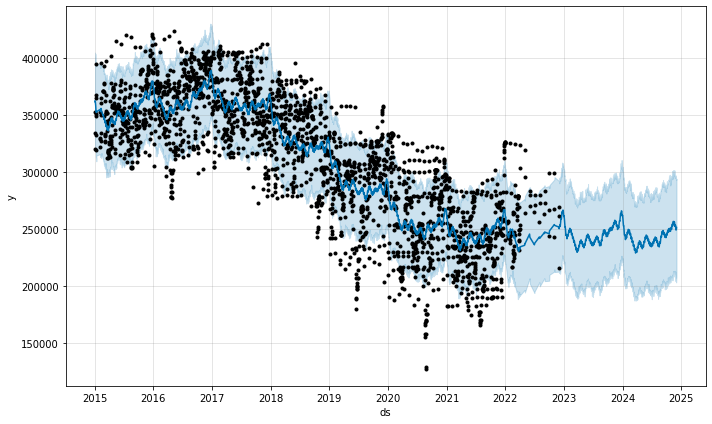

In [127]:
make_prediction(df['Date'],df['Nuclear'],365*2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -84.4369
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3450.32      0.041378       174.814           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       3455.96    0.00236182       219.845   1.642e-05       0.001      168  LS failed, Hessian reset 
     199       3486.58   0.000357927       55.7332           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3495.83    0.00606564       66.7973      0.7436      0.7436      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       3499.67   0.000705351       125.484   6.516e-06       0.001      479  LS failed, Hessian reset 
     399       3502.92   0.000423534       75.8541     0.06352       0.265      584   
    Iter      log pro

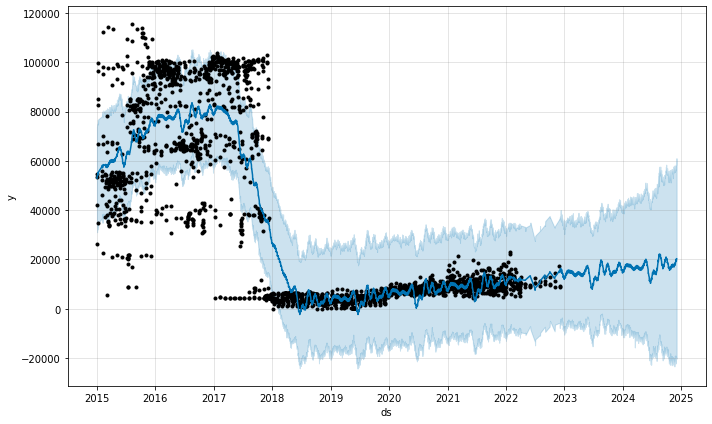

In [129]:
make_prediction(df['Date'],df['Other'],365*2)

# make_prediction(df['Date'],df['Import'],365*2)